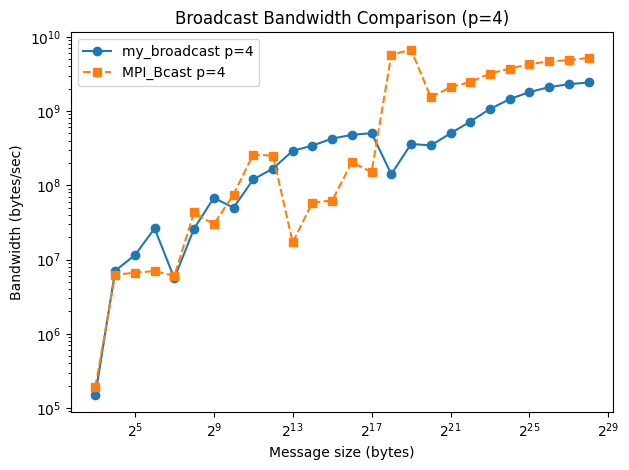

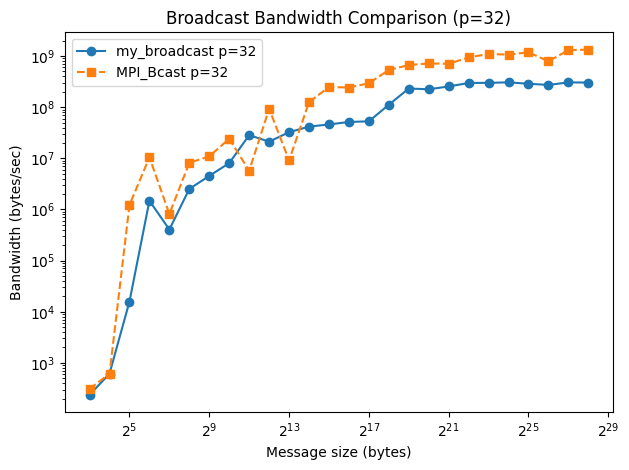

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# List of processor counts
processors = [4, 32]

for p in processors:
    df = pd.read_csv(f'proc_{p}.csv')

    plt.figure()  # Create a new figure for each processor count

    # Plotting the bandwidth data
    plt.loglog(df['bytes'], df['my_bw'], 'o-', label=f'my_broadcast p={p}')
    plt.loglog(df['bytes'], df['mpi_bw'], 's--', label=f'MPI_Bcast p={p}')

    # Formatting the plot
    plt.xlabel('Message size (bytes)')
    plt.ylabel('Bandwidth (bytes/sec)')
    plt.title(f'Broadcast Bandwidth Comparison (p={p})')
    plt.xscale('log', base=2)
    plt.legend()
    plt.tight_layout()

    # Save each plot with a unique filename
    plt.savefig(f'broadcast_bandwidth_p{p}.png')
    plt.show()
